In [1]:
import pandas as pd  
import jieba  
import jieba.analyse as analyse  
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing import sequence  
from tensorflow.keras.models import Sequential  
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, MaxPool1D, Conv1D  
from tensorflow.python.keras.layers.embeddings import Embedding  
from tensorflow.python.keras.utils import multi_gpu_model  
from tensorflow.python.keras.models import load_model  
from tensorflow.python.keras import regularizers  # 正则化  
import matplotlib.pyplot as plt  
import numpy as np  
from tensorflow.python.keras.utils import plot_model  
from sklearn.model_selection import train_test_split  
from tensorflow.python.keras.utils.np_utils import to_categorical  
from sklearn.preprocessing import LabelEncoder  
from tensorflow.python.keras.layers import BatchNormalization

In [2]:
job_detail_pd = pd.read_json('E:/tulip-flip/flip01/data/train.json', encoding='UTF-8')  
label = list(job_detail_pd['cuisine'].unique())  # 标签  
print(label)  
  
# 上标签  
def label_dataset(row):
    num_label = label.index(row)   
    return num_label  
   
job_detail_pd['label'] = job_detail_pd['cuisine'].apply(label_dataset)  
job_detail_pd = job_detail_pd.dropna()  # 删除空行  
job_detail_pd.head(5)

['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian']


,cuisine,id,ingredients,label
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",0
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",1
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",2
3,indian,22213,"[water, vegetable oil, wheat, salt]",3
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",3


In [3]:
 # 建立2000个词的字典  
token = Tokenizer(num_words = 2000)   
token.fit_on_texts(job_detail_pd['ingredients']) #按单词出现次数排序，排序前2000的单词会列入词典中  
4.    
# 使用token字典将“文字”转化为“数字列表”  
Job_Description_Seq = token.texts_to_sequences(job_detail_pd['ingredients'])  
7.    
# 截长补短让所有“数字列表”长度都是50  
Job_Description_Seq_Padding = sequence.pad_sequences(Job_Description_Seq, maxlen=50)  
10.    
x_train = Job_Description_Seq_Padding  
y_train = job_detail_pd['label'].tolist()

In [18]:
model = Sequential()  
model.add(Embedding(output_dim = 32,  # 词向量的维度  
                  input_dim = 2000,  # Size of the vocabulary 字典大小  
                  input_length = 50  # 每个数字列表的长度  
                    )    
         )  
  
model.add(Conv1D(256,  # 输出大小  
                3,   # 卷积核大小  
                   padding='same',   
                  activation='relu')) 
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPool1D(3,3,padding='same'))

model.add(Conv1D(128, 3, padding='same', activation='relu'))  
model.add(Flatten())  
model.add(Dropout(0.5))  
model.add(BatchNormalization()) # (批)规范化层 

model.add(Dense(256,activation='relu'))  
#model.add(Dropout(0.5))  
model.add(Dense(units =20,  
                 activation = "softmax"))  
   
batch_size = 256  
epochs = 100      
#单GPU版本  
model.summary()  # 可视化模型  
model.compile(loss = "sparse_categorical_crossentropy",  # 多分类  
            optimizer = "adam",  
            metrics = ["accuracy"])  
 
history = model.fit(  
         x_train,   
         y_train,  
         batch_size=batch_size,  
         epochs=epochs,  
         validation_split = 0.2  
       # 训练集的20%用作验证集  
          )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 32)            64000     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 50, 256)           24832     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 256)           0         
_________________________________________________________________
batch_normalization_v1_6 (Ba (None, 50, 256)           1024      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 17, 256)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 17, 128)           98432     
_________________________________________________________________
flatten_3 (Flatten)          (None, 2176)             

Epoch 43/100
31819/31819 [==============================] - 53s 2ms/sample - loss: 0.3022 - accuracy: 0.8964 - val_loss: 1.0828 - val_accuracy: 0.7442
Epoch 44/100
31819/31819 [==============================] - 54s 2ms/sample - loss: 0.2940 - accuracy: 0.9026 - val_loss: 1.0967 - val_accuracy: 0.7410
Epoch 45/100
31819/31819 [==============================] - 52s 2ms/sample - loss: 0.2895 - accuracy: 0.8990 - val_loss: 1.0987 - val_accuracy: 0.7420
Epoch 46/100
31819/31819 [==============================] - 52s 2ms/sample - loss: 0.2794 - accuracy: 0.9048 - val_loss: 1.1108 - val_accuracy: 0.7409
Epoch 47/100
31819/31819 [==============================] - 51s 2ms/sample - loss: 0.2727 - accuracy: 0.9068 - val_loss: 1.1242 - val_accuracy: 0.7431
Epoch 48/100
31819/31819 [==============================] - 51s 2ms/sample - loss: 0.2796 - accuracy: 0.9052 - val_loss: 1.1045 - val_accuracy: 0.7436
Epoch 49/100
31819/31819 [==============================] - 51s 2ms/sample - loss: 0.2742 - ac

31819/31819 [==============================] - 74s 2ms/sample - loss: 0.1855 - accuracy: 0.9371 - val_loss: 1.3722 - val_accuracy: 0.7340
Epoch 98/100
31819/31819 [==============================] - 76s 2ms/sample - loss: 0.1810 - accuracy: 0.9376 - val_loss: 1.3911 - val_accuracy: 0.7393
Epoch 99/100
31819/31819 [==============================] - 74s 2ms/sample - loss: 0.1776 - accuracy: 0.9393 - val_loss: 1.3639 - val_accuracy: 0.7409
Epoch 100/100
31819/31819 [==============================] - 74s 2ms/sample - loss: 0.1794 - accuracy: 0.9400 - val_loss: 1.3481 - val_accuracy: 0.7332


In [19]:
from tensorflow.python.keras.utils import plot_model  


In [20]:
model.save('model_CNN_text.h5')  #  生成模型文件 'my_model.h5'  

In [21]:
from tensorflow.python.keras.models import load_model  
# 加载模型  
# model = load_model('model_CNN_text.h5')  
print(x_train[0])  
y_new = model.predict(x_train[0].reshape(1, 50))  
print(list(y_new[0]).index(max(y_new[0])))  
print(y_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0 297 339 343   5  11  28 515 492 218]
0
0


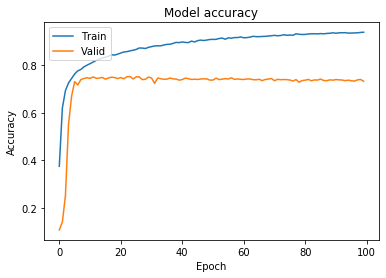

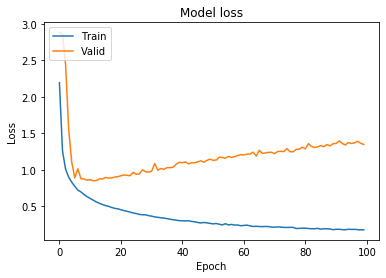

In [22]:
import matplotlib.pyplot as plt  
# 绘制训练 & 验证的准确率值  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Model accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['Train', 'Valid'], loc='upper left')  
plt.savefig('Valid_acc.png')  
plt.show()  
   
# 绘制训练 & 验证的损失值  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Model loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['Train', 'Valid'], loc='upper left')  
plt.savefig('Valid_loss.png')  
plt.show()